# Toy model

Try to reproduce the composition profile with analytical functions

<AxesSubplot:>

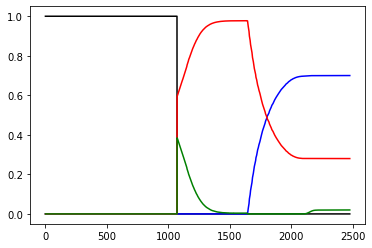

In [4]:
import py_mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt

def plot_X():
    prof = mr.MesaData("profile37.data")
    fig,ax = plt.subplots(1,1)
    ax.plot(prof.R_cm-12e5, prof.fe56, 'k-', label='h1')
    ax.plot(prof.R_cm-12e5, prof.h1, 'b-', label='h1')
    ax.plot(prof.R_cm-12e5, prof.he4, 'r-', label='he4')
    ax.plot(prof.R_cm-12e5, prof.c12, 'g-', label='c12')
    return ax

plot_X()

First fit the h1 with sigmoid

In [ ]:
from scipy.optimize import curve_fit
xdata = prof.R_cm-12e5
ydata = prof.h1
ydata[ydata==1e-99] = 0
plt.plot(x,y,'k-',lw=1.5)

# asymetrical sigmoid
def func(x,a,b,c,d,m):
    return d + (a-d)/(1+(x/c)**b)**m

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'g--')
print('fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, m=%5.3f' % tuple(popt))

plt.plot(xdata, func(xdata, a=0, b=171, c=1655, d=0.7, m=0.087), 'm:')

In [ ]:
# toy model params

# composition of ash and layers
Xash_fe56 = 1
Xlayer1_he4 = 1
Xlayer2_h1 = 0.7
Xlayer2_he4 = 0.28
Xlayer2_c12 = 0.02

# dimensions
nx = 1024
xmin = 0
xmax = 3072

H_star = 1100 # height of substrate
delta1 = 10 # distance over which transition from substrate to layer1 takes place
delta2 = 

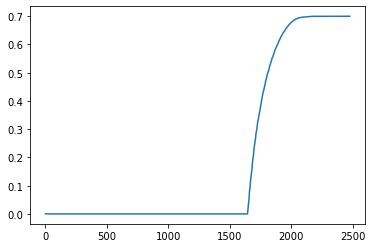